In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
pwd = os.getcwd()
path = pwd + '/asn1/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [22]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


/Applications/Pineapple.app/Contents/Resources/python2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


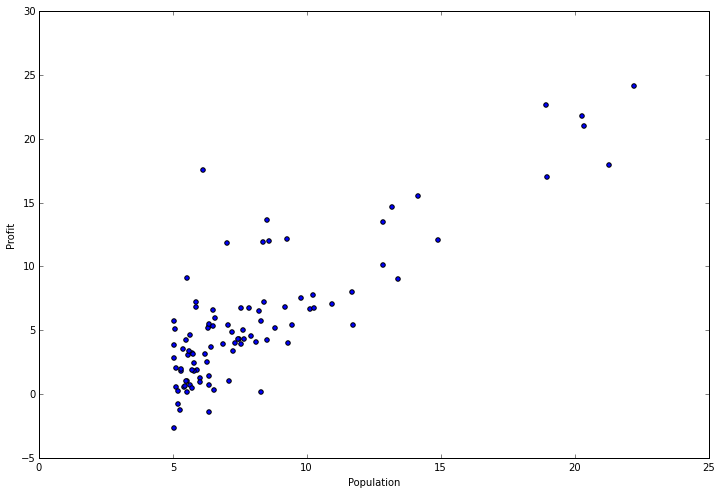

In [23]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))

In [24]:
# append a ones column to the front of the data
data.insert(0, 'Ones', 1)

In [25]:
# set X (training data) and y (target variable)
cols = data.shape[1]

# locate every row, and every column but the last
X = data.iloc[:, :cols - 1]

# locate every row, and the last column
y = data.iloc[:, cols-1:]

In [26]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [27]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

# Cost Function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

Where the hypothesis function is

$$ h_{\theta} = \theta^{T}x = \theta_0 + \theta_1x_1$$

In [28]:
# cost function
m = len(X)
h = X * theta.T

# Constants must floats to maintain fractions in division
cost = (1.0 / (2 * m)) * np.sum(np.power(h - y, 2))

cost

32.072733877455676

# Gradient Descent

$$ \theta_{j} := \theta_{j}  - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)} $$ (simultaneously update $\theta_j$ for all j)

In [29]:
# predefine alpha and num of iterations. This is found in your original source code for best values
alpha = 0.01
iters = 1750

m = len(X)
temp_theta = np.matrix(np.zeros(theta.shape))

# Unroll your theta parameters to a one-dimensional array. Not necessary
# for this example, but standard practice for when theta becomes
# multidimensional (think CNNs, where it's a matrix instead of a vector)
num_parameters = theta.flatten().shape[1]
cost = np.zeros(iters)

for i in range(iters):
    h = X * theta.T

    temp_theta = theta - (alpha * (1.0 / m)) * sum(np.multiply(h - y, X))

    theta = temp_theta
    cost[i] = (1.0 / (2 * m)) * np.sum(np.power(h - y, 2))

print "Theta:", theta[0, 0], theta[0, 1]
print "Cost:", cost[-1]

Theta: -3.72667594174 1.17604521906
Cost: 4.47958419398


In [30]:
cost_history = pd.DataFrame(cost, columns=['Cost'])
cost_history['Iterations'] = cost_history.index
cost_history.head(10)

,Cost,Iterations
0,32.072734,0
1,6.737190,1
2,5.931594,2
3,5.901155,3
4,5.895229,4
5,5.890095,5
6,5.885004,6
7,5.879932,7
8,5.874879,8
9,5.869844,9


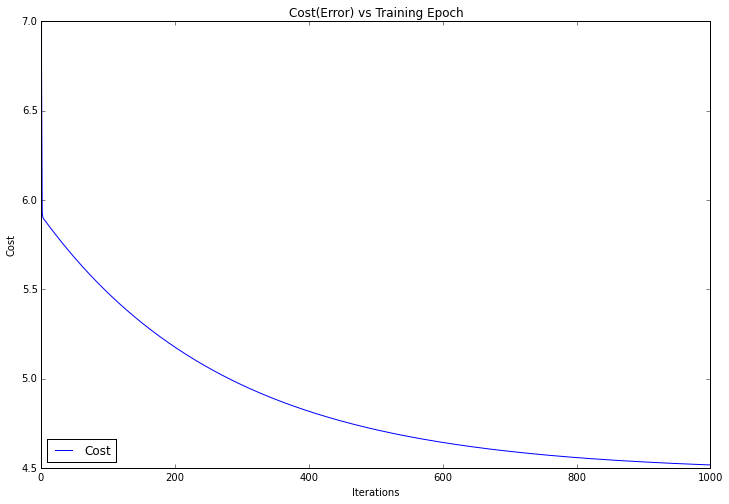

In [31]:
pplt = cost_history.plot(kind='line', x='Iterations', y='Cost', title='Cost(Error) vs Training Epoch', figsize=(12, 8), ylim=(4.5, 7), xlim=(0, 1000))
pplt.set_ylabel('Cost')

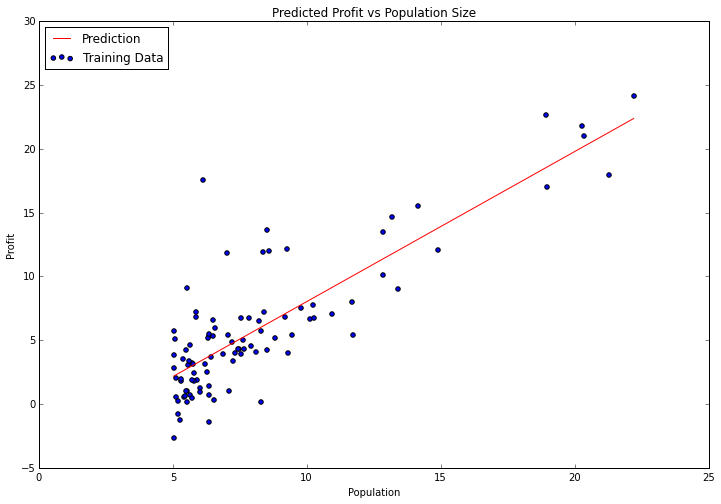

In [32]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)

# our prediction, same thing as before theta0 + theta1 * x, just with
# our learned parameters for theta now
prediction = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, prediction, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs Population Size')

# Scitkit-Learn

We don't have to be doing everything in scratch. One of the best machine learning libraries out there is *scikit-learn*. Let's see how to implement the exact same thing with that

In [33]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

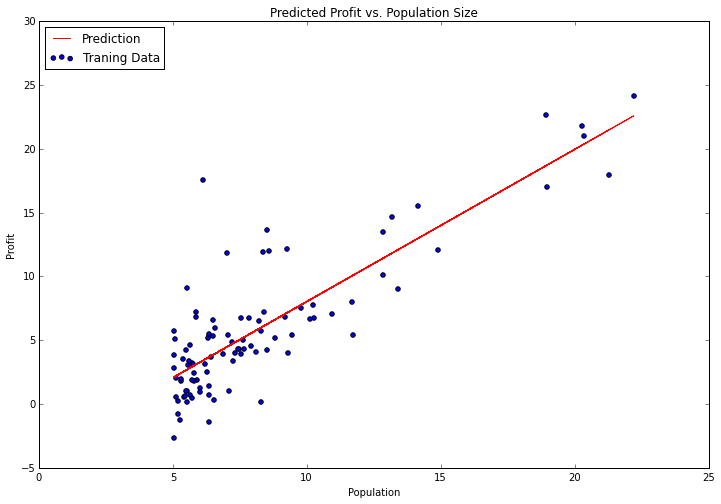

In [34]:
x = np.array(X[:, 1].A1)  
prediction = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, prediction, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size') 